# Foundations of Machine Learning

### Date: September 21, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

## Chapter 1: Probabilistic formulations of prediction problems (Supervised Learning)
(a.k.a Statistical Learning Theory)

#### Goal: 
Predict the outcome of $y$ from set $\mathcal{Y}$ of possible outcomes on the basis of some observations $x$ from a feater space $\mathcal{X}$.

Example:
$x$ : word in a document, image
$y$ : category of document, image

Denote $h(x)$ as the prediction of $y$ from $x$.

Using dataset of $n$ pairs:
$$
(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)
$$
to choose a function (hypothesis) $h : \mathcal{X} \rightarrow \mathcal{Y}$ so that, for a new pair $(x, y)$, $h(x)$ is a good predictor of $y$.
To define the notion of a GOOD prediction, we can define a loss function $l : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ that measures the loss of predicting $y$ when the true outcome is $y$.

So $l(y, h(x))$ quantifies the cost of predicting $h(x)$ when the true outcome is $y$, then we ensure that $l(y, h(x))$ is small.

##### Example:
In the pattern classification (binary classification) we could define the loss function as:
$$
l(y, h(x)) = \begin{cases}
0 & \text{ if } y = h(x) \\
1 & \text{ if } y \neq h(x)
\end{cases}
$$
For regression problems, wiht $\mathcal{Y} = \mathbb{R}$, we could define the loss function as:
$$
l(y, h(x)) = (y - h(x))^2
$$
Also known as the quadratic loss function.
### Probabilistic assumptions

Assumes:
- There is a probability distribution $P$ on $\mathcal{X} \times \mathcal{Y}$.
- The pair $(\mathcal{X}, \mathcal{Y}), \dots (\mathcal{X}_n, \mathcal{Y}_n)$ are i.i.d. samples from $P$.

The aime is to choose a function $h : \mathcal{X} \rightarrow \mathcal{Y}$ with small risk:
$$
R(h) = \mathbb{E}_{(x, y) \sim P}[l(y, h(x))]
$$
where the expectation is taken with respect to the distribution $P$.

$$
\mathbb{E}_{(x, y) \sim P}[l(y, h(x))] = \int_{\mathcal{X} \times \mathcal{Y}} l(y, h(x)) dP(x, y) \\
= \int_{\mathcal{X}} \int_{\mathcal{Y}} l(y, h(x)) dP(y|x) dP(x) \\
= \int_{\mathcal{X}} \int_{\mathcal{Y}} l(y, h(x)) P(y|x) dP(x) dy \\
= \int_{\mathcal{X}} \mathbb{E}_{y \sim P(y|x)}[l(y, h(x))] dP(x) \\
= \mathbb{E}_{x \sim P(x)}[\mathbb{E}_{y \sim P(y|x)}[l(y, h(x))]] \\
= \mathbb{E}_{x \sim P(x)}[R_x(h)]
$$
where $P(y|x)$ is the conditional probability of $y$ given $x$.

For instance, in binary classification, this is the misclassification probability:
$$
R(h) = \mathbb{E}_P[1_{y \neq h(x)}] = \int_{\mathcal{X}} \int_{\mathcal{Y}} 1_{y \neq h(x)} P(y|x) dP(x) dy
$$
where:
- $1_{y \neq h(x)}$ is the indicator function that is 1 if $y \neq h(x)$ and 0 otherwise. 
- $\int_{\mathcal{X}} \int_{\mathcal{Y}} 1_{y \neq h(x)} P(y|x) dP(x) dy$ is the probability of misclassification.
#### Remarks:
- Capital letters $X$ and $Y$ are used to denote random variables, while lower case letters $x$ and $y$ are used to denote their values.
- $P$ models both the relative frequency of different features $\mathcal{X}$ and the relationship between the features and the labels $\mathcal{Y}$.
- The assumption that the samples are i.i.d. is very strong
- The function $x \mapsto h_n(x : \mathcal{X}_1, \mathcal{Y}_1 \dots, \mathcal{X}_n, \mathcal{Y}_n$ is random, since it depends on the random samples $\mathcal{D}_n = \{(\mathcal{X}_1, \mathcal{Y}_1), \dots, (\mathcal{X}_n, \mathcal{Y}_n)\}$.

Thus, the risk
$$
h_n = \mathbb{E}_{P}[l(Y, h_n(X)) \mid \mathcal{D}_n] = \mathbb{E}[l(\mathcal{Y}_1, h_n(\mathcal{X}_1)) + \cdots + l(\mathcal{Y}_n, h_n(\mathcal{X}_n)) \mid \mathcal{D}_n]
$$
is a random variable. We might aime for $\mathbb{E}[R(h_n)]$ to be small or for $R(h_n)$ to be small with high probability (over training sets $\mathcal{D}_n$).
### Key questions
We might choose $h_n$ from some class $\mathcal{H}$ of functions (such as (linear) classifiers, neural networks, decision trees, etc.). Question we are interested in:
1. Can we design an algorithm for which $R(h_n)$ is closed to the best possible given that it was choosen from $\mathcal{H}$? (that is $R(h_n) - \inf_{h \in \mathcal{H}} R(h)$ is small)
2. How does the performance of $h_n$ depend on the size of the training set $n$? On the complexity of the class $\mathcal{H}$?
3. Can we assure that $R(h_n)$ approaches the best performance possible: $\inf_{f} R(f)$?
### Key issues

**Approximation**: How good is the best possible $h$ in $\mathcal{H}$?
$$
\inf_{h \in \mathcal{H}} R(h) - \inf_{f} R(f)
$$

**Estimation**: How close is our performance to the best possible $h$ in $\mathcal{H}$?
$$
R(h_n) - \inf_{h \in \mathcal{H}} R(h)
$$

**Computation**: We need to use data to choose $h_n$ from $\mathcal{H}$, typically by slowing some kind of optimization problem. How can we do this efficiently?


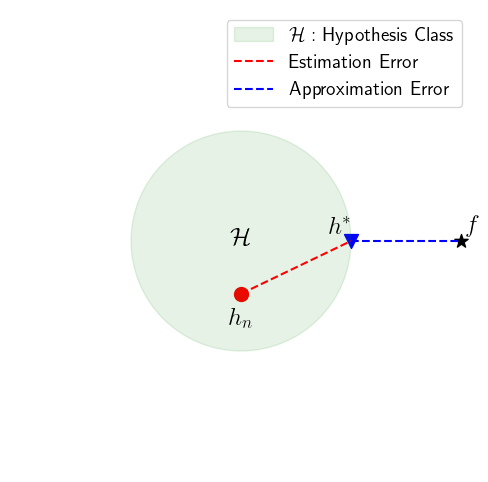

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.scatter(0, -0.24, marker='o', color='r', s=100)
ax.scatter(0.5, 0, marker='v', color='b', s=100)
ax.scatter(1, 0, marker='*', color='k', s=100)
ax.add_artist(plt.Circle((0, 0), 0.5, color='green', fill=True, alpha=0.1, label='$\mathcal{H}:$ Hypothesis Class'))
ax.annotate('$h_n$', xy=(0, -0.25), xytext=(0, -0.35), ha='center', va='center')
ax.annotate('$h^*$', xy=(0.5, 0), xytext=(0.45, 0.06), ha='center', va='center')
ax.annotate('$f$', xy=(1, 0), xytext=(1.05, 0.07), ha='center', va='center')
ax.text(0, 0, r'$\mathcal{H}$', ha='center', va='center')
ax.plot([0, 0.5], [-0.24, 0], '--', color='r', label='Estimation Error')
ax.plot([0.5, 1], [0, 0], '--', color='b', label='Approximation Error')
ax.legend(loc='upper right', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('scripts/figures/fig1.1.pdf', bbox_inches='tight')
plt.show()

### Date: September 28, 2023

We have samples $S = \{(x_1, y_1), \dots, (x_n, y_n)\}$ from a distribution $P$ on $\mathcal{X} \times \mathcal{Y}$.

The bad thing is that we could have bad luck and get a bad sample $S$. For example, if we have a sample of 1000 people and we want to predict the height of a person, we could have a sample of 1000 people that are all 2 meters tall. In this case, we would have a bad sample.

Recall the **Approximation error**:
$$
\inf_{h \in \mathcal{H}} R(h) - \inf_{f} R(f)
$$
We find how close the best possible $h$ in $\mathcal{H}$ is to the best possible $f$.

We have $R(h) = \mathbb{E}_{(x, y) \sim P}[l(y, h(x))]$ and $R(f) = \mathbb{E}_{(x, y) \sim P}[l(y, f(x))]$.

**Estimation error**:
$$
R(h_n) - \inf_{h \in \mathcal{H}} R(h)
$$
For any $h$ how close is $R(h_n)$ to $R(h)$, where $R(h_n) = \mathbb{E}_{(x, y) \sim P}[l(y, h_n(x))] = \frac{1}{n} \sum_{i=1}^n l(y_i, h_n(x_i))$.

**Excess risk**:
$$
R(h_n) - \inf_{h \in \mathcal{H}} R(h) = \underbrace{\left(R(h_n) - \mathbb{E}_{(x, y) \sim P}[l(y, h_n(x))]\right)}_{\text{Estimation error}} + \underbrace{\left(\mathbb{E}_{(x, y) \sim P}[l(y, h_n(x))] - \inf_{h \in \mathcal{H}} R(h)\right)}_{\text{Approximation error}}
$$

**Pattern classification:**

Consider two class classification with $\mathcal{Y} = \{-1, 1\}$ and so the data is represented by $(x_1, y_1), \dots, (x_n, y_n)$ where $x_i \in \mathcal{X}$ and $y_i \in \{-1, 1\}$, distributed according to $P$ on $\mathcal{X} \times \mathcal{Y}$ as the pair $(\mu, \eta)$ where $\mu = (\mu_{-1}, \mu_1) \in \mathbb{R}^d \times \mathbb{R}^d$ and $\eta \in \mathbb{R}^{d \times d}$.

$\mu$ is the marginal distribution of $x$ and $\eta$ is the conditional distribution of $y$ given $x$.

$$ \eta(x) = \mathbb{P}(y = 1 \mid x) = \frac{1}{1 + e^{-\langle \eta, x \rangle}} = \sigma(\langle \eta, x \rangle)$$
where $\sigma(t) = \frac{1}{1 + e^{-t}}$ is the sigmoid function.


**Remark:**
If we know $\eta$ then we could use it to find a decision function $h$ that minimizes the risk.
$$
R(h) = \mathbb{E}_{(x, y) \sim P}[l(y, h(x))] \\
= \mathbb{E}_{x \sim \mu}[\mathbb{E}_{y \sim \eta(x)}[l(y, h(x))]] \\
= \mathbb{E}_{x}[l(h(x), 1) \times P(y = 1 \mid x) + l(h(x), -1) \times P(y = -1 \mid x)] \\
= \mathbb{E}_{x}[l(h(x), 1) \times \eta(x) + l(h(x), -1) \times (1 - \eta(x))] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times \eta(x) + \mathbb{I}_{h(x) \neq -1} \times (1 - \eta(x))] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times \eta(x) + (1- \mathbb{I}_{h(x) \neq 1}) \times (1 - \eta(x))] \\
= \mathbb{E}_{x}[2 \times \mathbb{I}_{h(x) \neq 1} \times \eta(x) + 1 - \eta(x) - \mathbb{I}_{h(x) \neq 1}] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] \\
$$

**Bayes Decision Rule:**
This quantity is minimized by choosing $h = h^*$ where:
$$
h^*(x) = \begin{cases}
1 & \text{ if } \eta(x) \geq \frac{1}{2} \\
-1 & \text{ if } \eta(x) < \frac{1}{2}
\end{cases}
$$

Exercise: Decompose the risk for quadratic loss in regression.

$$
\mathcal{R}(h) = \mathbb{E}_{(x, y) \sim P}[l(y, h(x))] \\
l(y, h(x)) = (w^T x - y)^2 \\
$$
where $w \in \mathbb{R}^d$.

Bias: $$Bias[\theta] = \mathbb{E}_{S}[\hat{\theta}] - \theta$$
Variances: $$Var[\theta] = \mathbb{E}[(\mathbb{E}_{S}[\hat{\theta}] - \theta)^2]$$

$$
(y - \hat{y})^2 = (y - \mathbb{E}_{S}[\hat{y}] + \mathbb{E}_{S}[\hat{y}] - \hat{y})^2 \\
= (y - \mathbb{E}_{S}[\hat{y}])^2 + (\mathbb{E}_{S}[\hat{y}] - \hat{y})^2 + 2(y - \mathbb{E}_{S}[\hat{y}]) (\mathbb{E}_{S}[\hat{y}] - \hat{y}) \\
$$
donc:
$$
\mathbb{E}_{S}[(y - \hat{y})^2] = \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})^2] + 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}]) (\mathbb{E}_{S}[\hat{y}] - \hat{y})] \\
= \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})^2] + 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})] \\
= \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})^2]
$$
because $\mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] = 0$.
To continue:
$$
\mathbb{E}_{S}[(y - \hat{y})^2] = \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})^2] \\
= \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \mathbb{E}_{S}[\hat{y}] + \mathbb{E}_{S}[\hat{y}] - \hat{y})^2] \\
= \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \mathbb{E}_{S}[\hat{y}])^2 + (\mathbb{E}_{S}[\hat{y}] - \hat{y})^2 + 2(y - \mathbb{E}_{S}[\hat{y}]) (\mathbb{E}_{S}[\hat{y}] - \hat{y})] \\
= \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})^2] + 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})] \\
= \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])^2] + \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})^2]
$$

Prove that $2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})] = 0$:
$$
2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})] \\
= 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] (\mathbb{E}_{S}[\hat{y}] - \mathbb{E}_{S}[\hat{y} + \hat{y} - \hat{y}]) \\
= 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] (\mathbb{E}_{S}[\hat{y}] - \mathbb{E}_{S}[\hat{y}] + \mathbb{E}_{S}[\hat{y}] - \hat{y}) \\
= 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] (\mathbb{E}_{S}[\hat{y}] - \hat{y}) \\
= 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[\hat{y}] - 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \hat{y} \\
= 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[\hat{y}] - 2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[\hat{y}] \\
$$
So $2 \mathbb{E}_{S}[(y - \mathbb{E}_{S}[\hat{y}])] \mathbb{E}_{S}[(\mathbb{E}_{S}[\hat{y}] - \hat{y})] = 0$.

The optimal risk is called the **Bayes risk**, and is given by:
$$
R^* = \inf_{f} R(f) = R(f^*)
$$
where $f^*$ is the Bayes decision rule.

**Recal**: $R(h) = \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)]$
$h = f^*$, so: 
$$
R^* = \begin{cases}
\mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] & \text{ if } \eta(x) \geq \frac{1}{2} \\
\mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq -1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] & \text{ if } \eta(x) < \frac{1}{2}
\end{cases}
= \begin{cases}
\eta(x) & \text{ if } \eta(x) \geq \frac{1}{2} \\
1 - \eta(x) & \text{ if } \eta(x) < \frac{1}{2}
\end{cases}
$$

### Risk and distance from $f^*$

**Theorem**: For $h: \mathcal{X} \rightarrow \mathcal{Y}$, we have:
$$
R(h) - R(f^*) = \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq f^*(x)} \times (\mid2 \times \eta(x) - 1\mid)]
$$

Proof:
$$
R(h) - R(f^*) = \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] - \mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1)] - \mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1)] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) - \mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1)] \\
= \mathbb{E}_{x}[(\mathbb{I}_{h(x) \neq 1} - \mathbb{I}_{f^*(x) \neq 1}) \times (2 \times \eta(x) - 1)] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq f^*(x)} \times (2 \times \eta(x) - 1)]
$$
Value absolute value of $2 \times \eta(x) - 1$ is the distance from $f^*$ because $f^*(x) = 1$ if $\eta(x) \geq \frac{1}{2}$ and $f^*(x) = -1$ if $\eta(x) < \frac{1}{2}$.

So we can write the risk as:
$$
R(h) - R(f^*) = \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq f^*(x)} \times (\mid2 \times \eta(x) - 1\mid)]
$$

**Proof from Prof**:
We have $R(h) = \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)]$ and $R(f^*) = \mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)]$.
Hence:
$$
R(h) - R(f^*) = \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] - \mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1) + 1 - \eta(x)] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1)] - \mathbb{E}_{x}[\mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1)] \\
= \mathbb{E}_{x}[\mathbb{I}_{h(x) \neq 1} \times (2 \times \eta(x) - 1) - \mathbb{I}_{f^*(x) \neq 1} \times (2 \times \eta(x) - 1)] \\
= \mathbb{E}_{x}[\underbrace{(\mathbb{I}_{h(x) \neq 1} - \mathbb{I}_{f^*(x) \neq 1}) \times (2 \times \eta(x) - 1)}_{A}] \\
$$

We can write $A$ as:
$$
A = \mathbb{I}_{h(x) \neq f^*(x)}(\mathbb{I}_{h(x) \neq 1} - \mathbb{I}_{f^*(x) \neq 1}) \times (2 \times \eta(x) - 1) \\
= \begin{cases}
\mathbb{I}_{h(x) \neq f^*(x)} \times (2 \times \eta(x) - 1) & \text{ if } \eta(x) \geq \frac{1}{2} \\
-\mathbb{I}_{h(x) \neq f^*(x)} \times (2 \times \eta(x) - 1) & \text{ if } \eta(x) < \frac{1}{2}
\end{cases}
= \mathbb{I}_{h(x) \neq f^*(x)} \times (\mid2 \times \eta(x) - 1\mid)
$$

**Plug-in classifier**:
Use the data to come up with an estimate $\hat{\eta}$ of $\eta$ and then use the Bayes decision rule with $\hat{\eta}$ instead of $\eta$.
$$
h_{\hat{\eta}}(x) = \begin{cases}
1 & \text{ if } \hat{\eta}(x) \geq \frac{1}{2} \\
-1 & \text{ if } \hat{\eta}(x) < \frac{1}{2}
\end{cases}
$$

In estimating $\eta$, what criteria should we use? We could use the empirical risk minimization (ERM) criterion:
$\mathcal{L}_{\mu}$ is the distance between $\eta$ and $\hat{\eta}$:
**Theorem**: For any $\mu \in \mathbb{R}^d$ and $\eta \in \mathbb{R}^{d \times d}$, we have:
$$
R(h_{\hat{\eta}}) - R(f^*) \leq \mathcal{L}_{\mu}(\eta, \hat{\eta}) = 2 \times \mathbb{E}_{x \sim \mu}[\mid \eta(x) - \hat{\eta}(x) \mid]
$$


**Proof**:
We can write that $R(h_{\hat{\eta}}) - R(f^*) = 2 \times \mathbb{E}_{x}[\mathbb{I}_{h_{\hat{\eta}}(x) \neq f^*(x)} \times (\mid \eta(x) - \frac{1}{2} \mid)]$.

See that $h_{\hat{\eta}}(x) \neq f^*(x)$ if and only if $\hat{\eta}(x) \neq \eta(x)$ and $\eta(x) \geq \frac{1}{2}$ or $\hat{\eta}(x) \neq \eta(x)$ and $\eta(x) < \frac{1}{2}$. They has to be different side of $\frac{1}{2}$.
So $|\eta(x) - \hat{\eta}(x)| \geq |\eta(x) - \frac{1}{2}|$.
Then we have:
$$
R(h_{\hat{\eta}}) - R(f^*) = 2 \times \mathbb{E}_{x}[\mathbb{I}_{h_{\hat{\eta}}(x) \neq f^*(x)} \times (\mid \eta(x) - \frac{1}{2} \mid)] \\
\leq 2|\eta(x) - \hat{\eta}(x)| \times \mathbb{E}_{x}[\mathbb{I}_{h_{\hat{\eta}}(x) \neq f^*(x)}] 
$$

##### ESTIMATING $\eta$ IS NOT NECESSARY

Notice that estimating $\eta$ accurately is not necessary for accurate classification. In particular, this bound a plugin classifier $h_{\hat{\eta}}$ can be very loose. For instance, if $\eta(x) = \{0, 1\}$ then for any $\epsilon > 0$, we can find $\hat{\eta}$ satisfying that:
- $\hat{\eta}(x)$ and $\eta(x)$ are always on the same side of $\frac{1}{2}$. 
- $\mathcal{L}_{\mu}(\eta, \hat{\eta}) = \frac{1-\epsilon}{2} \text{Almost surely}$.

So $R(h_{\hat{\eta}}) - R(f^*) = 0 \ll 1 - \epsilon = 2 \times \mathbb{E}_{x \sim \mu}[\mid \eta(x) - \hat{\eta}(x) \mid]$.
That is the bound might be vacuous even though the classifier is optimal.

##### Choosing from a class of decision rules

An alternative to model the conditional probability $\eta$ of $Y$ given $X$: Fix a class $\mathcal{H}$ of functions from $X$ to $Y$ (decision rules), and use data choose $h_n$ from $\mathcal{H}$.

For examples, consider the class of linear threshold functions on $\mathbb{R}^d$:
$$
\mathcal{H} = x \mapsto sign(\theta^T x): \theta \in \mathbb{R}^d
$$
where $sign(t) = \begin{cases}
1 & \text{ if } t \geq 0 \\
-1 & \text{ if } t < 0
\end{cases}$

The decision boundaries are hyperplanes through the origin ($d - 1$ dimensional subspaces of $\mathbb{R}^d$) and the decision regions are half-spaces through the origin.
- Easy to understand and interpret
- Easy to compute
- Optimal if class conditional probabilities (conditional probabilities of $Y$ given $X$) are (linear functions of $X$) e.g. Gaussian with the same covariance matrix

**Linear threshold functions**:
For threshold linear functions, the decision boundaries are hyperplanes through the origin.
For threshold affine functions, the decision boundaries are hyperplanes:
$$
\mathcal{H} = \begin{cases}
x \mapsto sign(\theta^T x + c): \theta \in \mathbb{R}^d, c \in \mathbb{R} \\
x \mapsto sign(\theta^T \tilde{x}): \tilde{x} \in \mathbb{R}^{d+1}
\end{cases}
$$

## Empirical risk minimization
**Question**: How to choose $h_n$ from $\mathcal{H}$?
**Answer**: One approach is empirical risk minimization (ERM), choose $h_n$ from $\mathcal{H}$ to minimize the empirical risk:
$$
\hat{R}_n(h) = \mathbb{E}_{(x, y) \sim \hat{P}_n}[l(y, h(x))] = \frac{1}{n} \sum_{i=1}^n l(y_i, h(x_i))
$$
where $\hat{P}_n$ is the empirical distribution of the data:

**Linear threshold functions**:
Consider empirical risk minimization for the class of linear threshold functions on $\mathbb{R}^d$:
- **Approximation**: Very restricted class of decision rules, we can consider a much larger class and retain the attractive properties of linearly parametrized functions, by considering a non-linear transformation of the input space:
$$
\Phi: \mathbb{R}^d \rightarrow \mathbb{R}^D \quad \text{for some } D \gg d
$$
- **Estimation**: Small $\frac{d}{n}$ is ok, but large can be ok if we regularize.
- **Computation**: Easy if $\hat{R}_n = 0$. In general, hard if not. Can simplify if we consider after native (convex) loss functions $l$.

Logistic regression:
$$
\mathcal{H} = \{x \mapsto sign(\theta^T \Phi(x)): \theta \in \mathbb{R}^D\}
$$
where $\Phi: \mathbb{R}^d \rightarrow \mathbb{R}^D$ is a non-linear transformation of the input space.

**Logistic loss**:
$$
l(y, h(x)) = \log(1 + e^{-y \times h(x)})
$$

Maximizing the likelihood of the data under the model:
$$
\mathcal{L}(\theta) = \prod_{i=1}^n \frac{1}{1 + e^{-y_i \times \theta^T \Phi(x_i)}}

\ell(\theta) = \log \mathcal{L}(\theta) = \sum_{i=1}^n \log(1 + e^{-y_i \times \theta^T \Phi(x_i)})
$$

### Perceptron algorithm

Input $\left(X_1, Y_1\right), \ldots,\left(X_N, Y_N\right) \in \mathbb{R}^d \times\{-1,1\}$
- $\theta_0 \leftarrow 0 \in \mathbb{R}^d$
- $t \leftarrow 0$
while $y_i \neq \operatorname{sign}\left(\theta_t^T x_i\right)$, i.e some $\left(x_i, y_i\right)$ are misclassfied do
- $\theta_{t+1} \leftarrow \theta_t+y_i x_i$
- $t \leftarrow t+1$
end while
return $\theta_t$

Reminder
$$
\operatorname{sign}(\alpha)= \begin{cases}1, & \text { if } \alpha>0 \\ -1, & \text { if } \alpha<0 \\ 0, & \text { if } \alpha=0\end{cases}
$$

**Convergence of Perceptron algorithm**:
Given linearly seperable data (i.e. there is a $\theta \in \mathbb{R}^d$ such that $\forall i, y_i \theta^T x_i>0$ ), for any choices made at the update step, it terminates (with empirical risk zero) after no more than $\frac{r^2}{\gamma^2}$ iterations, where $r = \max_i \Vert x_i \Vert$ and $\gamma = \min_i \frac{y_i \theta^T x_i}{\Vert \theta \Vert}$.

**Proof**:

The idea is to use the inner product $\theta_t^T \theta$ as a measure of progress, and show that each mistake gives a big increase to the inner product (aligns $\theta_t$ with $\theta$ ), but gives only a small increase to $\left\|\theta_t\right\|$.

First,
$$
\begin{aligned}
\theta_{t+1}^T \theta & =\left(\theta_t+y_i x_i\right)^T \theta \\
& \geq \theta_t^T \theta+\gamma\|\theta\| .
\end{aligned}
$$

But $\theta_0=0$, so $\theta_t^T \theta \geq t \gamma\|\theta\|$.

On the other hand,
$$
\begin{aligned}
\left\|\theta_{t+1}\right\|^2 & =\left\|\theta_t+y_i x_i\right\|^2 \\
& =\left\|\theta_t\right\|^2+\left\|x_i\right\|^2+2 y_i \theta_t^T x_i \\
& \leq\left\|\theta_t\right\|^2+r^2 .
\end{aligned}
$$

But $\theta_0=0$, so $\left\|\theta_t\right\|^2 \leq t r^2$.
Combining (and using Cauchy-Shwarz):
$$
\begin{aligned}
t \gamma\|\theta\| & \leq \theta_t^T \theta & \leq \|\theta_t\| \|\theta\| \leq \sqrt{t} r\|\theta\| \\
\end{aligned}
$$

**Proof of Linh**:

The goal is to analyze the behavior of the vector $\theta_t$ as it gets updated over iterations. We're particularly interested in two aspects: how well $\theta_t$ aligns with a fixed vector $\theta$, and the growth of the magnitude of $\theta_t$. To do this, we will examine the inner product $\theta_t^T \theta$ and the norm $\left\|\theta_t\right\|$.

First, consider the update rule for $\theta_t$:
\begin{equation}
\theta_{t+1} = \theta_t + y_i x_i
\end{equation}
where $y_i$ and $x_i$ are data points.

Now, let's analyze the inner product $\theta_t^T \theta$:
\begin{equation}
\begin{aligned}
\theta_{t+1}^T \theta & =\left(\theta_t+y_i x_i\right)^T \theta \\
& \geq \theta_t^T \theta+\gamma\|\theta\| .
\end{aligned}
\end{equation}
Here, $\gamma$ is the minimum margin, and the inequality shows that each update increases the alignment of $\theta_t$ with $\theta$.

Since $\theta_0=0$, we have:
\begin{equation}
\theta_t^T \theta \geq t \gamma\|\theta\|.
\end{equation}
This indicates that the alignment increases at least linearly with the number of updates.

Next, we examine the growth of the norm of $\theta_t$:
\begin{equation}
\begin{aligned}
\left\|\theta_{t+1}\right\|^2 & =\left\|\theta_t+y_i x_i\right\|^2 \\
& =\left\|\theta_t\right\|^2+\left\|x_i\right\|^2+2 y_i \theta_t^T x_i \\
& \leq\left\|\theta_t\right\|^2+r^2 .
\end{aligned}
\end{equation}
Here, $r$ is the maximum norm of $x_i$, and the inequality shows that the norm of $\theta_t$ grows by at most $R^2$ per update.

Since $\theta_0=0$, we get:
\begin{equation}
\left\|\theta_t\right\|^2 \leq t r^2.
\end{equation}
This indicates that the norm's growth is bounded by $tr^2$.

Finally, combining these results and using the Cauchy-Schwarz inequality:
\begin{equation}
\begin{aligned}
t \gamma\|\theta\| & \leq \theta_t^T \theta & \leq \|\theta_t\| \|\theta\| \leq \sqrt{t} r\|\theta\| \\
\end{aligned}
\end{equation}
This encapsulates the balance between alignment and growth: as $\theta_t$ aligns more with $\theta$, its norm does not grow too fast.
So we can have $t \gamma\|\theta\| \leq \sqrt{t} r\|\theta\|$ then $t \leq \frac{r^2}{\gamma^2}$. So the algorithm terminates after no more than $\frac{r^2}{\gamma^2}$ iterations.

New algorithm:

$$
\begin{aligned}
\min_{w \in \mathbb{R}^d} t(w)\\
s.t. \quad & \forall i, y_i w^T x_i \geq 1 \\

\Leftrightarrow argmin_{w \in \mathbb{R}^d} \frac{r^2}{\gamma ^2(w)}\\
s.t. \quad & \forall i, y_i w^T x_i \geq 1 \\

\Leftrightarrow argmin_{w \in \mathbb{R}^d} \frac{1}{\gamma(w)}\\
s.t. \quad & \forall i, y_i w^T x_i \geq 1
\end{aligned}
$$
where $r = \max_i \Vert x_i \Vert$ and $\gamma(w) = \min_i \frac{y_i w^T x_i}{\Vert w \Vert}$.

**A glimpse of kernel methods**

Notes: We can write $w_t$ in term of data: $w_t = \sum_{i=1}^n \alpha_i x_i$ where $\Vert \alpha \Vert = \sum_{i=1}^n |\alpha_i| = t$.
We can replace inner $\langle x, w \rangle = x^T w$ by $K(x, w) = \langle \Phi(x), \Phi(w) \rangle$ where $\Phi$ is a non-linear transformation of the input space.
- Predict: $$\hat{y}_i = sign(\sum_{j=1}^n \alpha_j \underbrace{\langle x_j, x_i \rangle}_{K(x_j, x_i)})$$
- Update: If $y_i \neq \hat{y}_i$ then $\alpha_i^{t+1} = \alpha_i^t + y_i$

### Support Vector Machines
$ L(w, w_0, \alpha) = \frac{1}{2} \Vert w \Vert^2 - \sum_{i=1}^n \alpha_i (y_i (w^T x_i + w_0) - 1)$

Derivative of $L$ with respect to $w$ and $w_0$:
$$
\begin{aligned}
\frac{\partial L}{\partial w} & = w - \sum_{i=1}^n \alpha_i y_i x_i = 0 \Rightarrow w = \sum_{i=1}^n \alpha_i y_i x_i \\
\frac{\partial L}{\partial w_0} & = - \sum_{i=1}^n \alpha_i y_i = 0 \Rightarrow \sum_{i=1}^n \alpha_i y_i = 0
\end{aligned}
$$

Plug in $w$ and $w_0$:
$$
\begin{aligned}
L(w, w_0, \alpha) & = \frac{1}{2} \Vert w \Vert^2 - \sum_{i=1}^n \alpha_i (y_i (w^T x_i + w_0) - 1) \\
& = \frac{1}{2} \Vert \sum_{i=1}^n \alpha_i y_i x_i \Vert^2 - \sum_{i=1}^n \alpha_i (y_i (\sum_{j=1}^n \alpha_j y_j \langle x_j, x_i \rangle + w_0) - 1) \\
& = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \langle x_i, x_j \rangle - \sum_{i=1}^n \alpha_i y_i (\sum_{j=1}^n \alpha_j y_j \langle x_j, x_i \rangle + w_0) + \sum_{i=1}^n \alpha_i \\
& = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \langle x_i, x_j \rangle - \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \langle x_j, x_i \rangle - w_0 \sum_{i=1}^n \alpha_i y_i + \sum_{i=1}^n \alpha_i \\
& = \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \langle x_i, x_j \rangle
\end{aligned}
$$

Derivative of $L$ with respect to $\alpha$:
$$
\begin{aligned}
\frac{\partial L}{\partial \alpha_i} & = 1 - \frac{1}{2} \sum_{j=1}^n \alpha_j y_j y_i \langle x_j, x_i \rangle - \frac{1}{2} \sum_{j=1}^n \alpha_i y_i y_j \langle x_i, x_j \rangle \\
\end{aligned}
$$
Because $\frac{\partial L}{\partial \alpha_i} = 0$ then $1 - \frac{1}{2} \sum_{j=1}^n \alpha_j y_j y_i \langle x_j, x_i \rangle - \frac{1}{2} \sum_{j=1}^n \alpha_i y_i y_j \langle x_i, x_j \rangle = 0$.
$$
\begin{aligned}
\Rightarrow 1 - \frac{1}{2} \sum_{j=1}^n \alpha_j y_j y_i \langle x_j, x_i \rangle & = \frac{1}{2} \sum_{j=1}^n \alpha_i y_i y_j \langle x_i, x_j \rangle \\
\Rightarrow 2 - \sum_{j=1}^n \alpha_j y_j y_i \langle x_j, x_i \rangle & = \sum_{j=1}^n \alpha_i y_i y_j \langle x_i, x_j \rangle \\
\end{aligned}
$$

So we have:
$$
\begin{aligned}
\sum_{j=1}^n \alpha_i y_i y_j \langle x_i, x_j \rangle & = 2 - \sum_{j=1}^n \alpha_j y_j y_i \langle x_j, x_i \rangle \\
& = 2 - \sum_{j=1}^n \alpha_j y_j y_i \langle x_i, x_j \rangle \\
& = 2 - \sum_{j=1}^n \alpha_j y_j y_i K(x_i, x_j) \\
\end{aligned}
$$

So $\alpha_i = \frac{1}{y^2_i \Vert x_i \Vert^2} (2 - \sum_{j=1}^n \alpha_j y_j y_i K(x_i, x_j))$.
